# The KXY Data Valuation Function Works (Classification)
We consider two synthetic classification problems where the highest accuracy achievable is known. We restrict ourselves to bivariate problems so that we may visualize the data.

We show that the data valuation analysis of the `kxy` package is able to recover the highest classification accuracy achievable almost perfectly. 

In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

# Required imports
import pandas as pd
import seaborn as sns
import kxy

## I - Generate the data
In each experiment, we partition a square into two parts: one containing blue dots, and the other containing red dots. 

Tasked with determining the color of a dot from its coordinates, the best classifier should be able to achieve perfect accuracy (by design).

To introduce a known level of noise/errors, we loop through points on the square and flip their color with probability $1-e$.





In [2]:
p = 0.1 # Error probability
n = 2000 # Sample size

### Flag Data

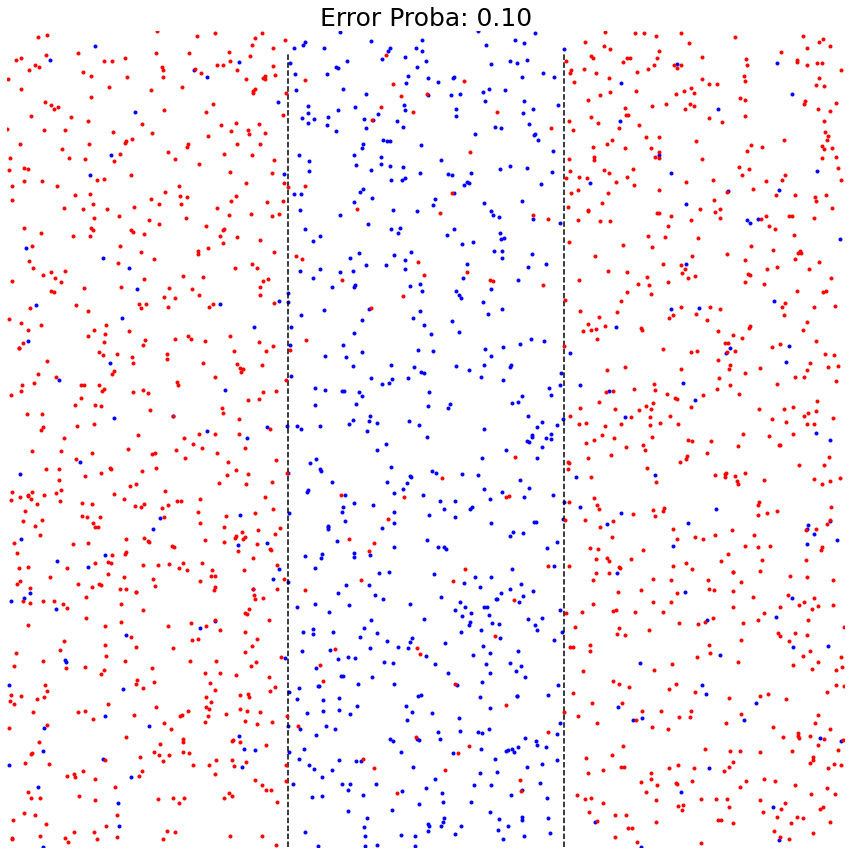

In [3]:
# Generate
u = -1.+2.*np.random.rand(n, 2)
perm = np.random.rand(n)<p
b = np.zeros(n)

b[perm] = np.logical_or(u[perm, 0] < -0.33, u[perm, 0] > 0.33)
b[np.logical_not(perm)] = np.logical_and(u[np.logical_not(perm), 0] >= -0.33, 
                                        u[np.logical_not(perm), 0] <= 0.33)

b = b.astype(bool)
r = np.logical_not(b)
zb = u[b, :]
zr = u[r, :]
yb = np.ones(zb.shape[0])
yr = np.zeros(zr.shape[0])
Xq = np.concatenate([zb, zr], axis=0)
Yq = np.concatenate([yb, yr], axis=0)
Zq = np.concatenate([Yq[:, None], Xq], axis=1)
# Numpy -> DataFrame
dfq = pd.DataFrame(Zq, columns=['label', 'var1', 'var2'])

# Plot
y_border = np.arange(-1., 1, 0.05)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
plt.plot(zb[:, 0], zb[:, 1], '.b')
plt.plot(-.33*np.ones_like(y_border), y_border, '--k')
plt.plot(.33*np.ones_like(y_border), y_border, '--k')
plt.plot(zr[:, 0], zr[:, 1], '.r')
ax.set_xlim([-1., 1.])
ax.set_ylim([-1., 1.])
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.axis('off')
ax.set_title(r'Error Proba: %.2f'% (p), fontsize=25)
plt.show()

### Circular Data

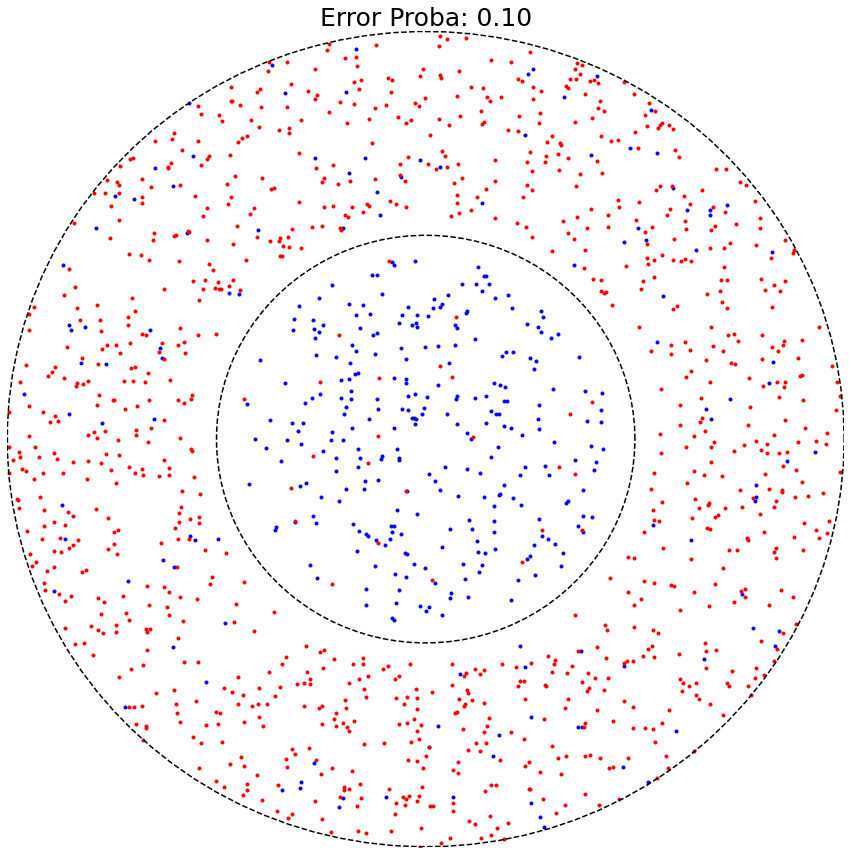

In [4]:
# Generate the data
dr = 0.05
u = -1.+2.*np.random.rand(n, 2)
perm = np.random.rand(n)<p
b = np.zeros(n)
b[perm] = np.logical_and(np.linalg.norm(u[perm], axis=1)>0.5+dr, np.linalg.norm(u[perm], axis=1)<1.)
b[np.logical_not(perm)] = np.linalg.norm(u[np.logical_not(perm)], axis=1)<0.5-dr
b = b.astype(bool)
r = np.logical_and(np.logical_not(b), np.linalg.norm(u, axis=1)<1.)
r = np.logical_and(r, np.logical_or(np.linalg.norm(u, axis=1)<0.5-dr, np.linalg.norm(u, axis=1)>0.5+dr))
z = u[np.linalg.norm(u, axis=1)<1., :]

zb = u[b, :]
zr = u[r, :]
yb = np.ones(zb.shape[0])
yr = np.zeros(zr.shape[0])
Xc = np.concatenate([zb, zr], axis=0)
Yc = np.concatenate([yb, yr], axis=0)
Zc = np.concatenate([Yc[:, None], Xc], axis=1)

# Numpy -> DataFrame
dfc = pd.DataFrame(Zc, columns=['label', 'var1', 'var2'])

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
theta = np.linspace(0, 2.*np.pi, 100)
r1, r2 = 0.5, 1.0
xc1, yc1 = r1*np.cos(theta), r1*np.sin(theta)
xc2, yc2 = r2*np.cos(theta), r2*np.sin(theta)

plt.plot(zb[:, 0], zb[:, 1], '.b')
plt.plot(zr[:, 0], zr[:, 1], '.r')
plt.plot(xc1, yc1, '--k')
plt.plot(xc2, yc2, '--k')
ax.set_xlim([-1., 1.])
ax.set_ylim([-1., 1.])
ax.axis('off')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_title(r'Error Proba: %.2f'% (p), fontsize=25)
plt.show()

## II - Data Valuation

### Flag Data

In [5]:
dfq.kxy.data_valuation('label', problem_type='classification')

[====================================================================================================] 100% ETA: 0s    Duration: 0s


,Achievable R-Squared,Achievable Log-Likelihood Per Sample,Achievable Accuracy
0,0.49,-3.15e-01,0.91


### Circular Data

In [6]:
dfc.kxy.data_valuation('label', problem_type='classification')

[====================================================================================================] 100% ETA: 0s    Duration: 0s


,Achievable R-Squared,Achievable Log-Likelihood Per Sample,Achievable Accuracy
0,0.42,-3.16e-01,0.90
